In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2025-10-14 10:12:19.331121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760436739.621226      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760436739.717197      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


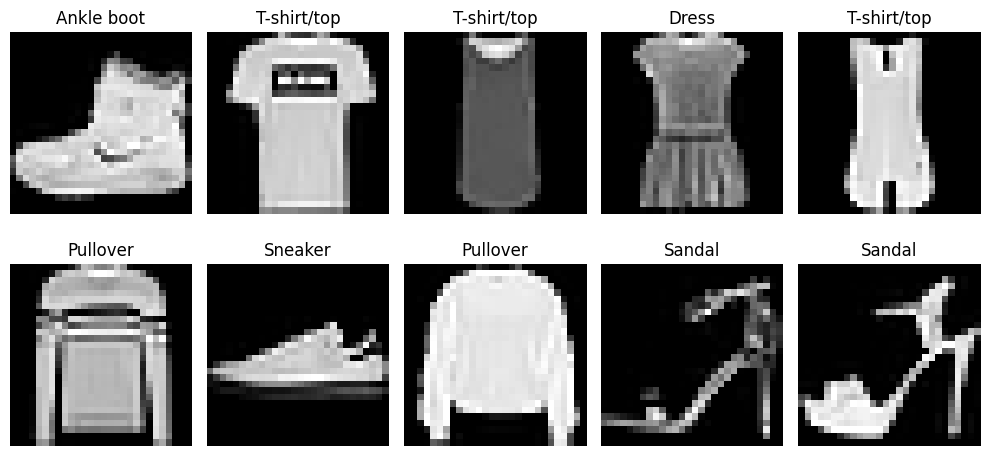

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [7]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [8]:
x_val = x_train_cnn[-10000:]
y_val = y_train_cat[-10000:]
x_train_cnn = x_train_cnn[:-10000]
y_train_cat = y_train_cat[:-10000]

print("Training set:", x_train_cnn.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test_cnn.shape)

Training set: (50000, 28, 28, 1)
Validation set: (10000, 28, 28, 1)
Test set: (10000, 28, 28, 1)


In [9]:
mlp_model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-14 10:12:36.628687: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

mlp_history = mlp_model.fit(
    x_train_cnn, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6782 - loss: 0.8959 - val_accuracy: 0.8413 - val_loss: 0.4309
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8359 - loss: 0.4619 - val_accuracy: 0.8590 - val_loss: 0.3804
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8518 - loss: 0.4124 - val_accuracy: 0.8704 - val_loss: 0.3625
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8627 - loss: 0.3789 - val_accuracy: 0.8730 - val_loss: 0.3481
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8689 - loss: 0.3572 - val_accuracy: 0.8773 - val_loss: 0.3427
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8720 - loss: 0.3487 - val_accuracy: 0.8747 - val_loss: 0.3442
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8729 - loss: 0.3446 - val_accuracy: 0.8823 - val_loss: 0.3206
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8815 - loss: 0.3242 - val_accuracy: 0.

In [12]:
mlp_loss, mlp_acc = mlp_model.evaluate(x_test_cnn, y_test_cat)
print(f" MLP Test Accuracy: {mlp_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8824 - loss: 0.3352
 MLP Test Accuracy: 88.19%


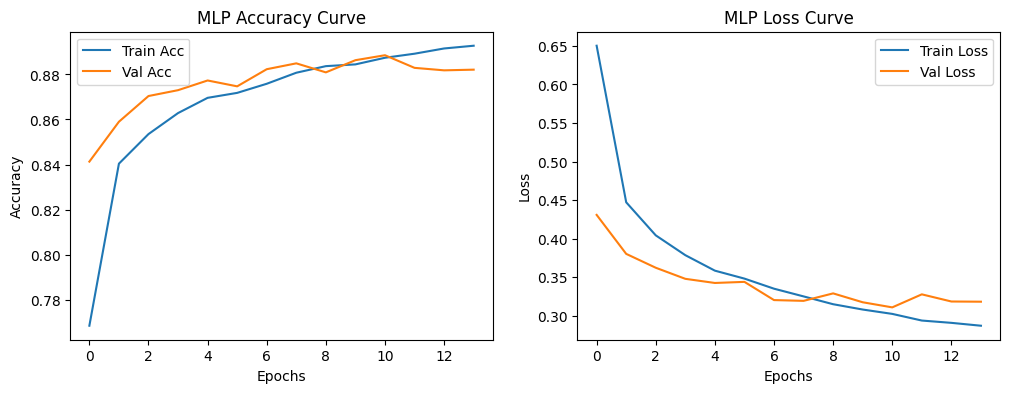

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(mlp_history.history['accuracy'], label='Train Acc')
plt.plot(mlp_history.history['val_accuracy'], label='Val Acc')
plt.title('MLP Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Val Loss')
plt.title('MLP Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


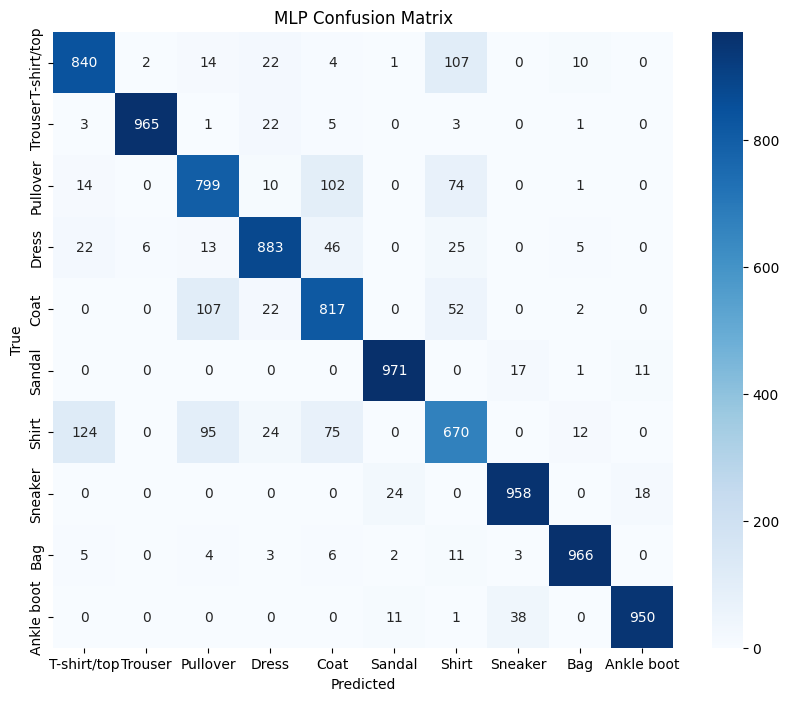

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.80      0.79      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.77      0.82      0.80      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.71      0.67      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [14]:
y_pred_mlp = np.argmax(mlp_model.predict(x_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_mlp, target_names=class_names))

In [15]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

cnn_history = cnn_model.fit(
    x_train_cnn, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stop_cnn],
    verbose=1
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.6107 - loss: 1.0614 - val_accuracy: 0.8219 - val_loss: 0.4874
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.8068 - loss: 0.5261 - val_accuracy: 0.8606 - val_loss: 0.3921
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.8391 - loss: 0.4492 - val_accuracy: 0.8693 - val_loss: 0.3598
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8537 - loss: 0.4078 - val_accuracy: 0.8814 - val_loss: 0.3201
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8612 - loss: 0.3825 - val_accuracy: 0.8853 - val_loss: 0.3126
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8688 - loss: 0.3600 - val_accuracy: 0.8907 - val_loss: 0.2956
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.8724 - loss: 0.3449 - val_accuracy: 0.8834 - val_loss: 0.3043
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8773 - loss: 0.3371 - 

In [18]:
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test_cat)
print(f" CNN Test Accuracy: {cnn_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9041 - loss: 0.2652
 CNN Test Accuracy: 90.49%


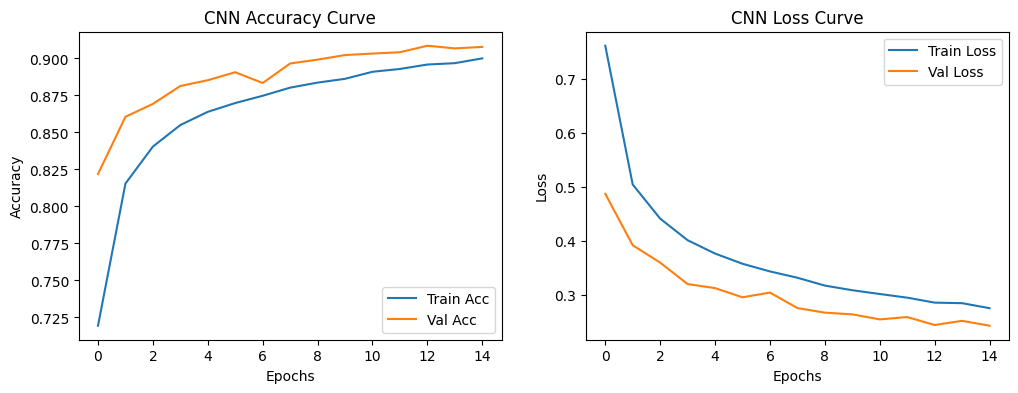

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'], label='Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


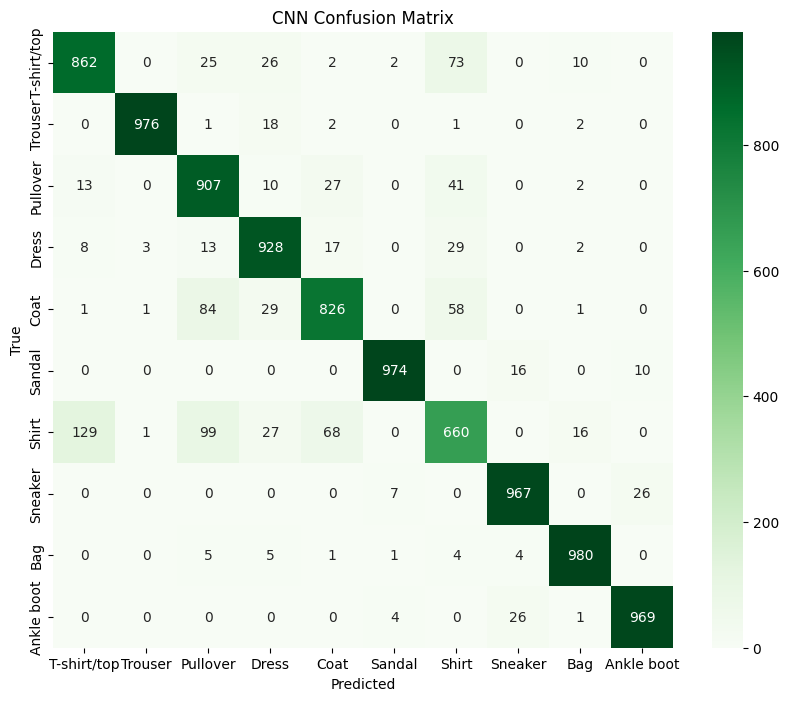

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.80      0.91      0.85      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.88      0.83      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.76      0.66      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [20]:
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(10,8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_cnn, target_names=class_names))

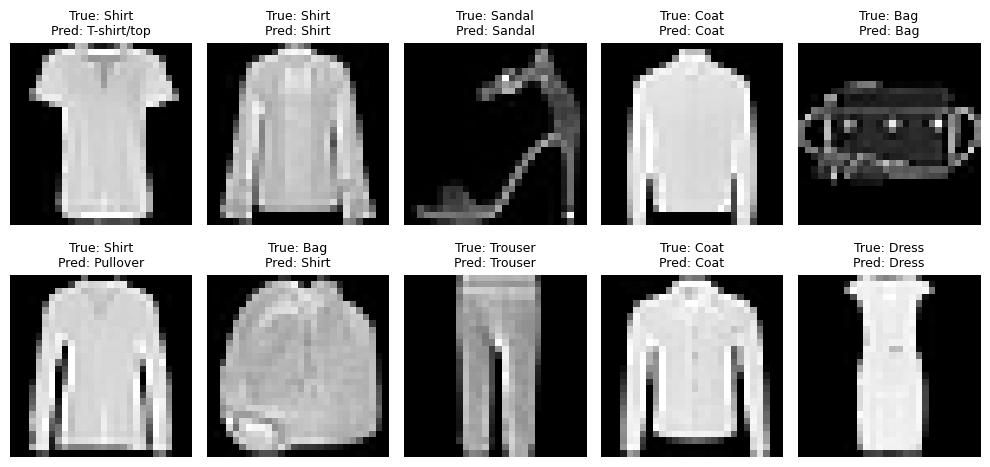

In [21]:
plt.figure(figsize=(10,5))
for i in range(10):
    idx = np.random.randint(0, len(x_test_cnn))
    img = x_test_cnn[idx]
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred_cnn[idx]]

    plt.subplot(2,5,i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()